In [1]:
import pandas as pd
import numpy as np
from scipy.linalg import sqrtm
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")
from scipy.spatial.distance import pdist,squareform,euclidean
from scipy.spatial import distance_matrix

np.random.seed(123)

In [2]:
def DNC(X, n_classes, n_steps=100, tol=1e-5):
    '''
    Implementation of Direct Normalized Cut (Algorithm 1) from the article.
    
    Attributes:
    ---
    X: ndarray
        Matrix (dxn), d is the number of features, n is the number of observations.
    n_classes: int
        Number of clusters.
    n_steps: int
        Number of iterations.
    tol: float
        Precision of the algorithm.
    
    Returns:
    ---
    Y: ndarray
         Matrix (nxc) with predicted clusters.
    '''
    
    A = squareform(pdist(X, "euclidean"))
                              
    D_A = np.diag(A.sum(axis=1))
    D_A_inv_0_5 = np.diag(np.power(A.sum(axis=1), -0.5))
    D_A_0_5 = np.diag(np.power(A.sum(axis=1), 0.5))
    
    M = D_A_inv_0_5 @ A @ D_A_inv_0_5 + np.eye(A.shape[0])
    
    for i in range(0, 100):
        try:
            M += i*np.eye(A.shape[0])
            np.linalg.cholesky(M)
            print("Matrix is fine")
            break
        except:
            print("finding i")
        pass
    
    Y = np.random.rand(A.shape[0], n_classes)
        
    trace_max = np.array([])
    n_iter = 0
    
    while n_iter < n_steps:
        G = M @ D_A_0_5 @ Y @ sqrtm(np.linalg.inv((Y.T @ D_A @ Y)))
        s_l = np.zeros_like(Y)
        for i in range(Y.shape[0]):
            for j in range(Y.shape[1]):
                ft = (Y[:, j]).T @ D_A_0_5 @ G[:, j]
                st = (Y[:, j]).T @ D_A @ Y[:, j]
                s_l[i, j] = (ft + G[i][j] * D_A_0_5[i][i]*(1-Y[i][j]))/np.sqrt(st + D_A[i][i]*(1-Y[i][j])) - (ft - Y[i][j]*D_A_0_5[i][i]*G[i][j])/np.sqrt(st - D_A[i][i]*Y[i][j])
                
        Y_new = np.zeros_like(Y)
        Y_new[np.arange(len(s_l)), s_l.argmax(1)] = 1
        Y = Y_new.copy()
              
        trace_max = np.append(trace_max, np.trace((D_A_0_5 @ Y @ sqrtm(np.linalg.inv((Y.T @ D_A @ Y)))).T @ G))
        n_iter += 1
    
        if n_iter > 1:
            if np.linalg.norm(trace_max[-1] - trace_max[-2]) < tol:
                break
            
    return Y

Matrix is fine


1.0

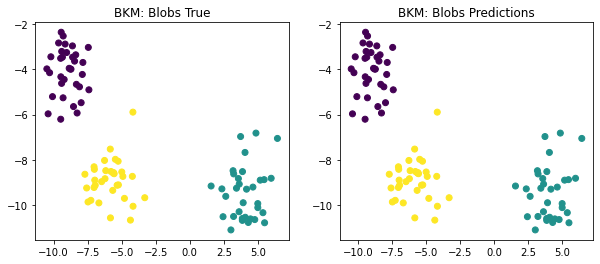

In [4]:
X, y = make_blobs(random_state = 21)
pred = DNC(X, 3, 100, 1e-5, False)
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
ax[0].scatter(X[:, 0], X[:, 1], c = y)
ax[0].set_title('BKM: Blobs True')
ax[1].scatter(X[:, 0], X[:, 1], c = np.argmax(pred, axis = 1))
ax[1].set_title('BKM: Blobs Predictions');

predictions = np.array([])
for i in range(pred.shape[0]):
    predictions = np.append(predictions, np.argmax(pred[i,:]))
accuracy_score(y, predictions)

* Isolet5 Dataset ($1559 \times 617$):

In [471]:
data = pd.read_csv("C:/Users/Yuliya/Downloads/isolet5.data", header=None)

In [472]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [473]:
X

,0,1,2,3,4,5,6,7,8,9,...,607,608,609,610,611,612,613,614,615,616
0,-0.2080,0.3480,0.3280,0.5040,0.9320,1.0000,0.8360,0.6680,0.2720,0.2400,...,0.1250,0.2500,-0.0624,0.2188,0.4532,0.1094,0.1718,0.1562,0.0468,-0.3750
1,-0.2864,0.1992,0.2822,0.4398,0.7012,0.7800,1.0000,0.9792,0.5850,0.4066,...,0.4418,-0.0078,-0.1472,-0.1782,0.0078,0.1162,-0.0542,-0.0542,-0.0388,-0.7984
2,-0.2348,0.3826,0.6142,0.7492,0.0546,-0.4020,-0.3504,-0.2990,-0.6848,-0.6528,...,0.2500,0.2834,0.1500,0.0834,-0.2000,-0.1834,0.0500,-0.0166,-0.1834,-0.8666
3,-0.1856,0.3592,0.7126,0.7366,0.3414,0.1018,-0.1556,-0.2514,-0.2514,-0.3892,...,0.1852,0.2840,0.5556,0.4568,0.4568,0.4568,0.2098,0.0370,-0.0618,-0.3334
4,-0.1814,0.4404,0.8394,1.0000,0.7564,0.1866,0.0260,-0.0726,-0.2124,-0.3730,...,0.1948,0.1688,-0.1688,0.2728,0.2988,0.2468,0.1948,-0.0130,-0.2988,-0.7662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,-0.6842,-0.3280,-0.1984,0.2956,0.8786,0.8948,0.3118,0.1822,0.1012,0.1740,...,0.8928,0.7738,0.7738,0.7142,0.6428,0.5952,0.5714,0.3928,0.4286,0.2858
1555,-0.5912,-0.2420,0.8174,1.0000,0.4642,0.6428,0.6944,0.3056,-0.3888,-0.6826,...,0.0192,0.1924,-0.1154,0.0192,0.2116,-0.0384,0.0192,-0.2308,-0.4230,-0.7116
1556,-0.6696,-0.3730,0.1584,0.8910,1.0000,0.9762,0.9762,0.7684,0.4106,0.0154,...,0.0000,0.0910,0.1818,0.2000,0.1454,0.0182,-0.2910,0.0728,0.0728,-0.5818
1557,-0.5764,-0.1764,0.5106,0.3742,-0.1670,-0.5858,-0.7882,-0.7224,-0.6330,-0.8212,...,0.3044,0.4130,0.5870,0.4348,0.5652,0.3478,-0.0434,0.3044,-0.0434,-0.5000


In [475]:
start = time.time()
pred = DNC(X, 26)
print(time.time() - start)

Matrix is fine
286.2714672088623


In [476]:
predictions = np.array([])
for i in range(pred.shape[0]):
    predictions = np.append(predictions, np.argmax(pred[i,:]))

In [477]:
accuracy_score(y, predictions)

0.04490057729313662

* Set number of clusters to be $13$:

In [11]:
start = time.time()
pred = DNC(X, 13)
print(time.time() - start)

Matrix is fine
48.635682344436646


In [12]:
predictions = np.array([])
for i in range(pred.shape[0]):
    predictions = np.append(predictions, np.argmax(pred[i,:]))
accuracy_score(y, predictions)

0.0391276459268762

* Set number of clusters to be $30$:

In [13]:
start = time.time()
pred = DNC(X, 30)
print(time.time() - start)

Matrix is fine
103.21634674072266


In [14]:
predictions = np.array([])
for i in range(pred.shape[0]):
    predictions = np.append(predictions, np.argmax(pred[i,:]))
accuracy_score(y, predictions)

0.039769082745349585

* Segment Dataset ($2310 \times 21$):

In [15]:
segments = pd.read_csv("C:/Users/Yuliya/Downloads/segments.csv")

In [16]:
y = np.array(segments["class"])
X = segments.drop(["class"], axis=1)
X = np.array(X)

In [17]:
start = time.time()
pred = DNC(X, 7)
print(time.time() - start)

Matrix is fine
82.428631067276


In [18]:
predictions = np.array([])
for i in range(pred.shape[0]):
    predictions = np.append(predictions, np.argmax(pred[i,:]))
accuracy_score(y, predictions)

0.14502164502164502

* Set number of clusters to be $3$:

In [19]:
start = time.time()
pred = DNC(X, 3)
print(time.time() - start)

Matrix is fine
37.22281765937805


In [20]:
predictions = np.array([])
for i in range(pred.shape[0]):
    predictions = np.append(predictions, np.argmax(pred[i,:]))
accuracy_score(y, predictions)

0.14242424242424243

* Set number of clusters to be $10$:

In [21]:
start = time.time()
pred = DNC(X, 10)
print(time.time() - start)

Matrix is fine
104.33990526199341


In [22]:
predictions = np.array([])
for i in range(pred.shape[0]):
    predictions = np.append(predictions, np.argmax(pred[i,:]))
accuracy_score(y, predictions)

0.1445887445887446

* NCI60 Dataset ($64 \times 6831$)

In [23]:
nci_60 = pd.read_csv("C:/Users/Yuliya/Downloads/NCI60.csv", header=None)
nci_60 = nci_60.dropna()

In [24]:
nci_60

,0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
1,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
2,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
3,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
4,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
5,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,...,-0.400020,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
61,V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,...,-0.560020,0.200000,0.290000,-0.035000,0.279980,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
62,V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,...,-0.160019,-0.120000,0.850000,-0.125000,0.779981,0.390000,0.000000,0.160000,2.030000,3.940000
63,V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,...,0.889981,-0.420000,-0.460000,-0.855000,-0.160019,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [25]:
nci_60[0]=nci_60[0].replace('V','',regex=True).astype(float)

In [26]:
y = np.array(nci_60[0])
X = nci_60.drop([0], axis=1)
X = np.array(X)

In [27]:
start = time.time()
pred = DNC(X, 64)
print(time.time() - start)

Matrix is fine
0.15801000595092773


In [28]:
predictions = np.array([])
for i in range(pred.shape[0]):
    predictions = np.append(predictions, np.argmax(pred[i,:]))
accuracy_score(y, predictions)

0.0

* Set number of clusters to be $30$:

In [29]:
start = time.time()
pred = DNC(X, 30)
print(time.time() - start)

Matrix is fine
0.07600760459899902


In [30]:
predictions = np.array([])
for i in range(pred.shape[0]):
    predictions = np.append(predictions, np.argmax(pred[i,:]))
accuracy_score(y, predictions)

0.0

* MNIST-Data-10 Dataset